# JY Law Case Study 2

#### Nitrogen, primarily nitrate, pollution is a major environmental concern in the U.S., causing several issues such as formation of hypoxic zone in the Gulf of Mexico. Many research has been done to understand the fate and transport mechanism of nitrogen in the environment, as well as the role of best management practices (BMPs) in reducing nitrogen losses. This paired watershed study located in Central Iowa provides an opportunity to explore the impact of stacked BMPs on nutrient reduction by comparing two adjacent watersheds: one with high-BMP, one with low-BMP implementation. The research outcome also may serve as a guideline/recommendation for future BMPs implementation in the region with similar soil properties and land uses. 

#### The objectives of this case study were to: 
<font color = blue>
a) analytes concentration comparison between sites <br>
b) analytes concentration comaprison between sample types <br>
c) correlations between flow and analytes concentration
</font>

In [1]:
import pandas as pd
import math
import numpy as np

data_main = pd.read_excel('ABE516x case study 2 raw data.xlsx', sheet_name = 'Data')
data_main.head()

,Site,Sample date,Sample type,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L)
0,Sub11,2015-03-20,Base,0.0060,0.020,0.025,1.692308,1.230769,0.0137,50.9792,41.6
1,Sub11,2015-03-27,Base,0.0060,0.020,0.014,0.500000,0.500000,0.0042,48.7837,40.8
2,Sub11,2015-04-03,Base,0.0240,0.001,0.015,1.231527,1.970443,0.0056,45.4211,42.8
3,Sub11,2015-04-11,Base,0.0245,0.012,0.029,7.540395,6.642729,0.0174,46.5769,43.0
4,Sub11,2015-04-17,Base,0.0250,0.001,0.016,1.691729,0.500000,0.0166,48.2718,43.0


In [2]:
data_sub = data_main[['Site', 'Sample date', 'Sample type', 'Flow (cms)', 'Ammonia (mg/L)', 'Nitrate (mg/L)', 'TN (mg/L)']]
#alternative: we can drop the columns that we don't want
#data_sub = data_main.drop(columns=['DRP (mg P/L)','TP (mg P/L)', 'TSS (mg/L)', 'VSS (mg/L)'])

data_sub.head()

,Site,Sample date,Sample type,Flow (cms),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L)
0,Sub11,2015-03-20,Base,0.0060,0.0137,50.9792,41.6
1,Sub11,2015-03-27,Base,0.0060,0.0042,48.7837,40.8
2,Sub11,2015-04-03,Base,0.0240,0.0056,45.4211,42.8
3,Sub11,2015-04-11,Base,0.0245,0.0174,46.5769,43.0
4,Sub11,2015-04-17,Base,0.0250,0.0166,48.2718,43.0


In [3]:
#extracting "baseflow" samples
data_sub11 = data_sub[data_sub ['Site']=='Sub11']

#further separating the dataset based on site ID
data_sub11_base = data_sub11[data_sub11 ['Sample type']=='Base']
data_sub11_event = data_sub11[data_sub11 ['Sample type']=='Event']
data_sub11_base.head()

,Site,Sample date,Sample type,Flow (cms),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L)
0,Sub11,2015-03-20,Base,0.0060,0.0137,50.9792,41.6
1,Sub11,2015-03-27,Base,0.0060,0.0042,48.7837,40.8
2,Sub11,2015-04-03,Base,0.0240,0.0056,45.4211,42.8
3,Sub11,2015-04-11,Base,0.0245,0.0174,46.5769,43.0
4,Sub11,2015-04-17,Base,0.0250,0.0166,48.2718,43.0


In [4]:
#extracting "eventflow" samples
data_sub12 = data_sub[data_sub ['Site']=='Sub12']

#further separating the dataset based on site ID
data_sub12_base = data_sub12[data_sub12 ['Sample type']=='Base']
data_sub12_event = data_sub12[data_sub12 ['Sample type']=='Event']
data_sub12_base.head()

,Site,Sample date,Sample type,Flow (cms),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L)
111,Sub12,2015-03-20,Base,0.020,0.006,11.7,8.2
112,Sub12,2015-03-27,Base,0.015,0.003,11.5,9.2
113,Sub12,2015-04-03,Base,0.014,0.003,12.9,11.7
114,Sub12,2015-04-11,Base,0.032,0.005,13.0,11.7
115,Sub12,2015-04-17,Base,0.043,0.009,12.9,11.7


In [5]:
#calculating the mean of each N analytes of each site and sample type
data_sub11_base_nitratemean = np.mean(data_sub11_base['Nitrate (mg/L)'])
data_sub11_base_ammoniamean = np.mean(data_sub11_base['Ammonia (mg/L)'])
data_sub11_base_TNmean = np.mean(data_sub11_base['TN (mg/L)'])

data_sub11_event_nitratemean = np.mean(data_sub11_event['Nitrate (mg/L)'])
data_sub11_event_ammoniamean = np.mean(data_sub11_event['Ammonia (mg/L)'])
data_sub11_event_TNmean = np.mean(data_sub11_event['TN (mg/L)'])

data_sub12_base_nitratemean = np.mean(data_sub12_base['Nitrate (mg/L)'])
data_sub12_base_ammoniamean = np.mean(data_sub12_base['Ammonia (mg/L)'])
data_sub12_base_TNmean = np.mean(data_sub12_base['TN (mg/L)'])

data_sub12_event_nitratemean = np.mean(data_sub12_event['Nitrate (mg/L)'])
data_sub12_event_ammoniamean = np.mean(data_sub12_event['Ammonia (mg/L)'])
data_sub12_event_TNmean = np.mean(data_sub12_event['TN (mg/L)'])

In [6]:
#Objective 1 and 2: comparing analytes concentration between sites and between sample types
conc_summary = pd.DataFrame({'Sample description': ['Sub11 base', 'Sub11 event', 'Sub12 base', 'Sub12 event'], 
                             'Nitrate mean': [data_sub11_base_nitratemean, data_sub11_event_nitratemean, data_sub12_base_nitratemean, data_sub12_event_nitratemean], 
                             'Ammonia mean': [data_sub11_base_ammoniamean, data_sub11_event_ammoniamean, data_sub12_base_ammoniamean, data_sub12_event_ammoniamean], 
                             'TN mean': [data_sub11_base_TNmean, data_sub11_event_TNmean, data_sub12_base_TNmean, data_sub12_event_TNmean]})
conc_summary

,Sample description,Nitrate mean,Ammonia mean,TN mean
0,Sub11 base,29.645126,0.061199,30.688544
1,Sub11 event,24.575203,0.139914,28.722897
2,Sub12 base,9.000000,0.063586,9.409195
3,Sub12 event,8.247619,0.053457,9.830952


In [7]:
import matplotlib.pyplot as plt

#extra: visualizing the data described above using boxplot - only for nitrate
data_sub11.boxplot('Nitrate (mg/L)', by = 'Sample type')
plt.suptitle ('')
plt.title('Sub11 nitrate')
plt.ylabel('Nitrate (mg/L)')
plt.show()

<Figure size 640x480 with 1 Axes>

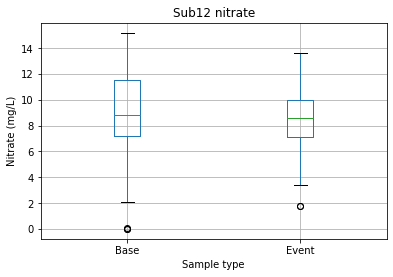

In [8]:
data_sub12.boxplot('Nitrate (mg/L)', by = 'Sample type')
plt.suptitle ('')
plt.title('Sub12 nitrate')
plt.ylabel('Nitrate (mg/L)')
plt.show()

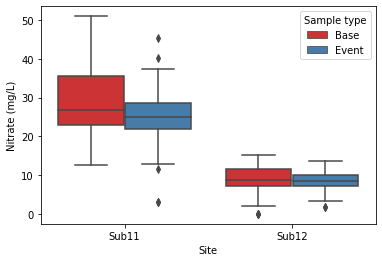

In [9]:
import seaborn as sns

sns.boxplot(x="Site", y="Nitrate (mg/L)", hue="Sample type", data=data_sub, palette="Set1")
plt.show()

In [10]:
data_sub11.head()

,Site,Sample date,Sample type,Flow (cms),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L)
0,Sub11,2015-03-20,Base,0.0060,0.0137,50.9792,41.6
1,Sub11,2015-03-27,Base,0.0060,0.0042,48.7837,40.8
2,Sub11,2015-04-03,Base,0.0240,0.0056,45.4211,42.8
3,Sub11,2015-04-11,Base,0.0245,0.0174,46.5769,43.0
4,Sub11,2015-04-17,Base,0.0250,0.0166,48.2718,43.0


In [11]:
#moving on - find correlations (scroll to top to see objectives 3 and 4)
#exporting data as arrays (separated by sites; each site includes both base and event flow samples)
flow_sub11 = np.array(data_sub11['Flow (cms)'])
nitrate_sub11 = np.array(data_sub11['Nitrate (mg/L)'])
ammonia_sub11 = np.array(data_sub11['Ammonia (mg/L)'])
TN_sub11 = np.array(data_sub11['TN (mg/L)'])

flow_sub12 = np.array(data_sub12['Flow (cms)'])
nitrate_sub12 = np.array(data_sub12['Nitrate (mg/L)'])
ammonia_sub12 = np.array(data_sub12['Ammonia (mg/L)'])
TN_sub12 = np.array(data_sub12['TN (mg/L)'])


In [80]:
#test for FLOW data normality using Shapiro Wilk test, then test for correlations between nitrate/ammonia/TN vs flow

from scipy import stats
from scipy.stats import spearmanr

data_for_flownorm = [flow_sub11, flow_sub12]
alpha = 0.05

for x in data_for_flownorm:
    norm_flow = stats.shapiro(x)
    print ('shapiro coef = %.3f' % norm_flow[0],';', 'shapiro p-value = %.3f' % norm_flow[1])
    
    #if flow is not normal, then conduct all flow vs analytes coef test using non-parametric test
    if norm_flow[1] < 0.05:
        if np.any(x == flow_sub11):
            coef, p = spearmanr(x, nitrate_sub11)
            if p > alpha:
                print('Flow and nitrate at sub 11 are not correlated: coef=; %.3f'% coef, 'p=%.3f'% p)
            else:
                print('Flow and nitrate at sub 11 are correlated: coef=; %.3f'% coef, 'p=%.3f'% p)
            coef, p = spearmanr(x, ammonia_sub11)
            if p > alpha:
                print('Flow and ammonia at sub 11 are not correlated: coef=; %.3f'% coef, 'p=%.3f'% p)
            else:
                print('Flow and ammonia at sub 11 are correlated: coef=; %.3f'% coef, 'p=%.3f'% p)
            coef, p = spearmanr(x, TN_sub11)
            if p > alpha:
                print('Flow and TN are at sub 11 not correlated: coef=; %.3f'% coef, 'p=%.3f'% p)
            else:
                print('Flow and TN are at sub 11 correlated: coef=; %.3f'% coef, 'p=%.3f'% p)
        else:
            coef, p = spearmanr(x, nitrate_sub12)
            if p > alpha:
                print('Flow and nitrate at sub 12 are not correlated: coef=; %.3f'% coef, 'p=%.3f'% p)
            else:
                print('Flow and nitrate at sub 12 are correlated: coef=; %.3f'% coef, 'p=%.3f'% p)
            coef, p = spearmanr(x, ammonia_sub12)
            if p > alpha:
                print('Flow and ammonia at sub 12 are not correlated: coef=; %.3f'% coef, 'p=%.3f'% p)
            else:
                print('Flow and ammonia at sub 12 are correlated: coef=; %.3f'% coef, 'p=%.3f'% p)
            coef, p = spearmanr(x, TN_sub12)
            if p > alpha:
                print('Flow and TN at sub 12 are not correlated: coef=; %.3f'% coef, 'p=%.3f'% p)
            else:
                print('Flow and TN at sub 12 are correlated: coef=; %.3f'% coef, 'p=%.3f'% p)

shapiro coef = 0.362 ; shapiro p-value = 0.000
Flow and nitrate at sub 11 are not correlated: coef=; -0.049 p=0.611
Flow and ammonia at sub 11 are not correlated: coef=; 0.131 p=0.171
Flow and TN are at sub 11 not correlated: coef=; 0.112 p=0.242
shapiro coef = 0.599 ; shapiro p-value = 0.000
Flow and nitrate at sub 12 are not correlated: coef=; 0.164 p=0.063
Flow and ammonia at sub 12 are not correlated: coef=; -0.045 p=0.614
Flow and TN at sub 12 are correlated: coef=; 0.309 p=0.000


C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


# Discussions (comparison between sample types and sites)
Objectives 1 & 2: <br>
Discussions below were made based on the summary table and boxplot above. <br>
<font color=red> 1) __For nitrate:__ </font> <br>
__Comparison btw/ sample types:__ In each site, average nitrate concentration was higher in baseflow than in eventflow samples <br>
__Comparison btw/ sites:__ Average nitrate concentration was higher at site sub11 than at sub12 regardless of sample types <br>
<br>
<font color=red> __2) For ammonia:__ </font> <br>
__Comparison btw/ sample types:__ At sub11, event samples had higher ammonia concentration than baseflow samples; opposite observation was found in sub12, but the difference btw/ base and event samples were not much. <br>
__Comparison btw/ sites:__ No difference in baseflow samples, but sub11 had much higher ammonia concentration in the event samples when compared to sub11. <br>
<br>
<font color=red> __3) For TN:__ </font> <br>
__Comparison btw/ sample types:__ No obvious difference between sample types at both subwatersheds <br>
__Comparison btw/ sites:__ Sub11 had much higher TN concentration than at sub12 regardless of sample types.


# Discussions (relationship between flow and nitrogen analytes)
Objective 3:
Discussions below were made based on the output of correlation tests above. <br>

Data is not normally distributed, so all correlation test was conducted using non-parametic spearman rho test. <br>
At sub11, no correlation was found between flow and any nitrogen analytes, thus indicating the precipitation (high flow) events did not increase N transport nor dilute N concentration in runoff water. <br>
At sub12, only flow and TN had significant correlation (p<0.05); no correlation was found between flow and other analytes. Similar to observation at sub11, nitrate and ammonia concentrations did not vary with flow conditions. However, positive correlation of TN and flow showed that TN concentration increased with flow, and further investigation is needed.

# Future development

Currently, this program processes a dataset that was summarized manually. I plan to integrate this program with a "data wrangling program" that would allow to pre-process (at least a big portion of it, although some inputs may requires human identification/classification such as event vs baseflow samples) the data from raw inputs (i.e. raw flow data from ISCO, nutrients concentration).

Moving further (one change at a time), the raw dataset (from nutrient analysis lab) should be formatted consistently so that a program can be written to import the raw nutrient data smoothly.

At the very end, the combination of the programs should be able import all raw input files, and formatted so that the pre-processed dataset is ready for any further analysis. Based on desired outputs (e.g. correlation test, concentration comparison, load calculation, load duration curve), new programs can be written and integrated for respective analysis. 